# Tree-2Outcomes-ClustCentUnder

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [2]:
file = "COVID-19-ML-CSV.csv"
full_results_df1 = pd.read_csv(file)
full_results_df1

,case_month,res_state,state_fips_code,res_county,county_fips_code,age_group,sex,race,ethnicity,case_positive_specimen_interval,case_onset_interval,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
0,2020-11,IN,18,POSEY,18129.0,0 - 17 years,NaN,NaN,NaN,0.0,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,No,NaN
1,2021-03,KY,21,WOODFORD,21239.0,0 - 17 years,NaN,NaN,NaN,NaN,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,No,NaN
2,2020-08,MI,26,ANTRIM,26009.0,18 to 49 years,NaN,NaN,NaN,NaN,0.0,Missing,Yes,Laboratory-confirmed case,Symptomatic,No,Missing,No,NaN
3,2021-07,WA,53,ASOTIN,53003.0,18 to 49 years,NaN,NaN,NaN,0.0,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,Yes,Missing,Missing,Yes
4,2020-07,WI,55,IOWA,55049.0,18 to 49 years,NaN,NaN,NaN,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Unknown,Missing,Unknown,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2020-11,MN,27,NICOLLET,27103.0,18 to 49 years,Male,White,Missing,0.0,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,No,NaN
1048571,2021-08,NY,36,TOMPKINS,36109.0,18 to 49 years,Male,White,Unknown,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,No,NaN
1048572,2021-09,IL,17,COOK,17031.0,50 to 64 years,Female,Missing,Hispanic/Latino,NaN,0.0,Missing,Missing,Laboratory-confirmed case,Missing,Yes,Missing,Missing,NaN
1048573,2020-12,CA,6,SAN MATEO,6081.0,0 - 17 years,Female,White,Hispanic/Latino,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Unknown,Missing,Missing,No,NaN


In [3]:
full_results_df2 = full_results_df1.drop(['case_month'], axis=1)
full_results_df2 = full_results_df2.drop(['state_fips_code'], axis=1)
full_results_df2 = full_results_df2.drop(['res_county'], axis=1)
full_results_df2 = full_results_df2.drop(['county_fips_code'], axis=1)
full_results_df2 = full_results_df2.drop(['case_positive_specimen_interval'], axis=1)
full_results_df2 = full_results_df2.drop(['case_onset_interval'], axis=1)
full_results_df2 = full_results_df2.drop(['current_status'], axis=1)
full_results_df2

,res_state,age_group,sex,race,ethnicity,process,exposure_yn,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
0,IN,0 - 17 years,NaN,NaN,NaN,Missing,Missing,Missing,Missing,Missing,No,NaN
1,KY,0 - 17 years,NaN,NaN,NaN,Missing,Missing,Symptomatic,No,Missing,No,NaN
2,MI,18 to 49 years,NaN,NaN,NaN,Missing,Yes,Symptomatic,No,Missing,No,NaN
3,WA,18 to 49 years,NaN,NaN,NaN,Missing,Missing,Symptomatic,Yes,Missing,Missing,Yes
4,WI,18 to 49 years,NaN,NaN,NaN,Missing,Missing,Missing,Unknown,Missing,Unknown,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,MN,18 to 49 years,Male,White,Missing,Missing,Missing,Missing,Missing,Missing,No,NaN
1048571,NY,18 to 49 years,Male,White,Unknown,Missing,Missing,Missing,Missing,Missing,No,NaN
1048572,IL,50 to 64 years,Female,Missing,Hispanic/Latino,Missing,Missing,Missing,Yes,Missing,Missing,NaN
1048573,CA,0 - 17 years,Female,White,Hispanic/Latino,Missing,Missing,Unknown,Missing,Missing,No,NaN


In [4]:
full_results_df2 = full_results_df2.dropna(how='any')
full_results_df2

,res_state,age_group,sex,race,ethnicity,process,exposure_yn,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
44,WA,0 - 17 years,Female,Missing,Hispanic/Latino,Missing,Missing,Symptomatic,Yes,No,Missing,Yes
53,KS,18 to 49 years,Male,Unknown,Hispanic/Latino,Clinical evaluation,Yes,Symptomatic,No,No,No,Yes
54,NJ,18 to 49 years,Male,Unknown,Hispanic/Latino,Missing,Missing,Symptomatic,No,Unknown,No,Yes
146,NC,18 to 49 years,Male,White,Hispanic/Latino,Missing,Unknown,Symptomatic,No,Unknown,No,Yes
200,NC,0 - 17 years,Female,White,Hispanic/Latino,Missing,Unknown,Symptomatic,No,Unknown,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
1048435,NC,50 to 64 years,Male,Black,Non-Hispanic/Latino,Missing,Unknown,Symptomatic,No,Unknown,No,Yes
1048447,AR,18 to 49 years,Female,White,Non-Hispanic/Latino,Missing,Missing,Symptomatic,No,Missing,Missing,Yes
1048466,ID,18 to 49 years,Male,White,Non-Hispanic/Latino,Missing,Yes,Symptomatic,No,Missing,Missing,Yes
1048522,NC,50 to 64 years,Female,White,Non-Hispanic/Latino,Missing,Missing,Symptomatic,Unknown,Unknown,No,Yes


In [5]:
# Make a copy of the df with the empty column "outcome"
results_df = full_results_df2.copy()

results_df["outcome"]=""
results_df

,res_state,age_group,sex,race,ethnicity,process,exposure_yn,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn,outcome
44,WA,0 - 17 years,Female,Missing,Hispanic/Latino,Missing,Missing,Symptomatic,Yes,No,Missing,Yes,
53,KS,18 to 49 years,Male,Unknown,Hispanic/Latino,Clinical evaluation,Yes,Symptomatic,No,No,No,Yes,
54,NJ,18 to 49 years,Male,Unknown,Hispanic/Latino,Missing,Missing,Symptomatic,No,Unknown,No,Yes,
146,NC,18 to 49 years,Male,White,Hispanic/Latino,Missing,Unknown,Symptomatic,No,Unknown,No,Yes,
200,NC,0 - 17 years,Female,White,Hispanic/Latino,Missing,Unknown,Symptomatic,No,Unknown,No,Yes,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048435,NC,50 to 64 years,Male,Black,Non-Hispanic/Latino,Missing,Unknown,Symptomatic,No,Unknown,No,Yes,
1048447,AR,18 to 49 years,Female,White,Non-Hispanic/Latino,Missing,Missing,Symptomatic,No,Missing,Missing,Yes,
1048466,ID,18 to 49 years,Male,White,Non-Hispanic/Latino,Missing,Yes,Symptomatic,No,Missing,Missing,Yes,
1048522,NC,50 to 64 years,Female,White,Non-Hispanic/Latino,Missing,Missing,Symptomatic,Unknown,Unknown,No,Yes,


In [6]:
# Populate "outcome" column
for idx, row in results_df.iterrows():
    if row['death_yn'] == "Yes":
        row['outcome'] = "severe"
 
    elif row['hosp_yn'] != "Yes" and row['icu_yn'] != "Yes" and row['death_yn'] != "Yes":
        row['outcome'] = "mild"
           
    elif row['hosp_yn'] != "Yes" and row['icu_yn'] == "Yes" and row['death_yn'] != "Yes":
        row['outcome'] = "severe"

        # change this outcome to be severe or mild depending which class you want "hosp" to land in.
    elif row['hosp_yn'] == "Yes" and row['icu_yn'] != "Yes" and row['death_yn'] != "Yes":
        row['outcome'] = "mild"

    elif row['hosp_yn'] == "Yes" and row['icu_yn'] == "Yes" and row['death_yn'] != "Yes":
        row['outcome'] = "mild"
    
    else:
        row['outcome'] = "mild"


# Print the contents and counts of the "outcome" column
outcome_counts = results_df.outcome.value_counts()
print(outcome_counts)

mild      44959
severe      259
Name: outcome, dtype: int64


In [7]:
results_df = results_df.drop(['hosp_yn'], axis=1)
results_df = results_df.drop(['icu_yn'], axis=1)
results_df = results_df.drop(['death_yn'], axis=1)
results_df

,res_state,age_group,sex,race,ethnicity,process,exposure_yn,symptom_status,underlying_conditions_yn,outcome
44,WA,0 - 17 years,Female,Missing,Hispanic/Latino,Missing,Missing,Symptomatic,Yes,mild
53,KS,18 to 49 years,Male,Unknown,Hispanic/Latino,Clinical evaluation,Yes,Symptomatic,Yes,mild
54,NJ,18 to 49 years,Male,Unknown,Hispanic/Latino,Missing,Missing,Symptomatic,Yes,mild
146,NC,18 to 49 years,Male,White,Hispanic/Latino,Missing,Unknown,Symptomatic,Yes,mild
200,NC,0 - 17 years,Female,White,Hispanic/Latino,Missing,Unknown,Symptomatic,Yes,mild
...,...,...,...,...,...,...,...,...,...,...
1048435,NC,50 to 64 years,Male,Black,Non-Hispanic/Latino,Missing,Unknown,Symptomatic,Yes,mild
1048447,AR,18 to 49 years,Female,White,Non-Hispanic/Latino,Missing,Missing,Symptomatic,Yes,mild
1048466,ID,18 to 49 years,Male,White,Non-Hispanic/Latino,Missing,Yes,Symptomatic,Yes,mild
1048522,NC,50 to 64 years,Female,White,Non-Hispanic/Latino,Missing,Missing,Symptomatic,Yes,mild


In [8]:
# Bar graph of outcome
import numpy as np
import matplotlib.pyplot as plt

# creating the dataset
mild = results_df['outcome']=='mild'
mild = results_df[results_df['outcome']=='mild']
mild = mild['outcome'].count()

severe = results_df['outcome']=='severe'
severe = results_df[results_df['outcome']=='severe']
severe = severe['outcome'].count()

outcome = {"Mild": mild, "Severe": severe}
category = list(outcome.keys())
count = list(outcome.values())
print(category)
print(count)

['Mild', 'Severe']
[44959, 259]


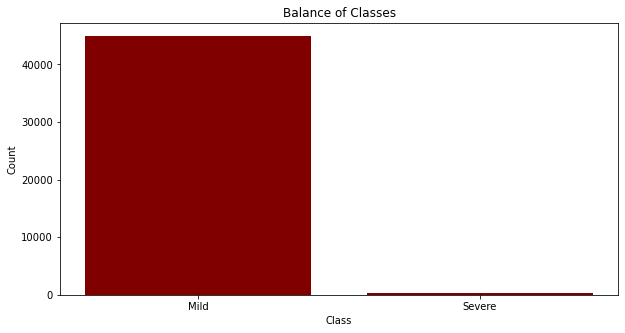

In [9]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(category, count, color = 'maroon')
 
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Balance of Classes")
plt.show()

In [10]:
le=LabelEncoder()

# Customize encoder.
results_encoded_df = results_df.copy()
columns = ("res_state", "age_group", "sex", "race", "ethnicity", "process", "exposure_yn", "symptom_status", 
           "underlying_conditions_yn", "outcome")
for column in columns:
    results_encoded_df[column] = le.fit_transform(results_df[column])

outcome_encode = results_df[['outcome']].copy()
outcome_encode['outcome_encode'] = le.fit_transform(results_df['outcome'].values)
outcome_encode = outcome_encode.drop_duplicates('outcome')

#results_encoded_df
outcome_encode

,outcome,outcome_encode
44,mild,0
19933,severe,1


In [11]:
X = results_encoded_df.copy()
X = X.drop("outcome", axis=1)
X

,res_state,age_group,sex,race,ethnicity,process,exposure_yn,symptom_status,underlying_conditions_yn
44,37,0,0,3,0,3,0,2,1
53,11,1,1,6,0,0,2,2,1
54,24,1,1,6,0,3,0,2,1
146,21,1,1,7,0,3,1,2,1
200,21,0,0,7,0,3,1,2,1
...,...,...,...,...,...,...,...,...,...
1048435,21,2,1,2,2,3,1,2,1
1048447,2,1,0,7,2,3,0,2,1
1048466,8,1,1,7,2,3,2,2,1
1048522,21,2,0,7,2,3,0,2,1


In [12]:
y = results_encoded_df["outcome"].values
y

array([0, 0, 0, ..., 0, 0, 0])

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1111)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(33913, 9)
(11305, 9)
(33913,)
(11305,)


In [14]:
from collections import Counter
Counter(y_train)

Counter({0: 33717, 1: 196})

In [15]:
from imblearn.under_sampling import ClusterCentroids
cc = ClusterCentroids(random_state=1111)
X_resampled, y_resampled = cc.fit_resample(X_train, y_train)

In [16]:
Counter(y_resampled)

Counter({0: 196, 1: 196})

# Decision Tree Model

In [17]:
# Decision Tree Model
model=tree.DecisionTreeClassifier()
model=model.fit(X_resampled, y_resampled)

predictions=model.predict(X_test)

cm = confusion_matrix(y_test, predictions)
cm_df=pd.DataFrame(cm)
cm_df=pd.DataFrame(
    cm, index=["Actual Mild", "Actual Severe"],
    columns=["Predicted Mild", "Predicted Severe"])
cm_df

,Predicted Mild,Predicted Severe
Actual Mild,6627,4615
Actual Severe,2,61


In [18]:
from sklearn.metrics import balanced_accuracy_score
bal_acc_score=accuracy_score(y_test, predictions)
bal_acc_score

0.5915966386554622

In [19]:
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test,predictions))

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      0.59      0.97      0.74      0.76      0.55     11242
          1       0.01      0.97      0.59      0.03      0.76      0.59        63

avg / total       0.99      0.59      0.97      0.74      0.76      0.55     11305

